In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Sequential
import tensorflow.keras.preprocessing.image as p

In [2]:
dataGen = p.ImageDataGenerator( rescale= 1./255  )

In [3]:
trainGen = dataGen.flow_from_directory( '../myimg', target_size=(98,98) )

Found 20 images belonging to 2 classes.


In [4]:
x_train, y_train = trainGen.next()

In [5]:
x_train.shape

(20, 98, 98, 3)

In [6]:
y_train.shape

(20, 2)

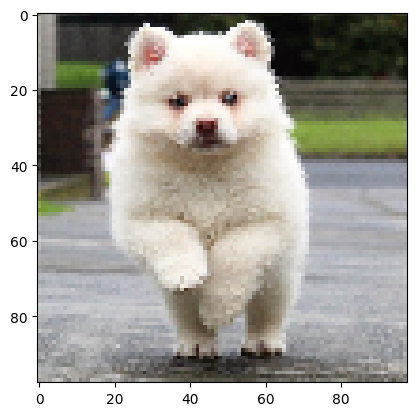

In [7]:
plt.imshow( x_train[0] )

In [8]:
y_train[0]

array([0., 1.], dtype=float32)

In [9]:
trainGen.class_indices

{'cat': 0, 'dog': 1}

In [10]:
model =Sequential()
model.add( Conv2D( 32, kernel_size=(3,3), strides=1, 
                  input_shape=(98,98,3), activation='relu', padding='same' ) )
model.add( Conv2D( 64, kernel_size=(3,3), activation='relu' ) )
model.add( MaxPool2D( pool_size=(2, 2) ) )
model.add( Flatten() )
model.add( Dense( units=64, activation='relu' ) )
model.add( Dense(units=2, activation='softmax') )
model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['acc']  )
# model.fit( x_train, x_train, epochs=10 )
model.fit( trainGen, epochs=50 )

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Epoch 1/50


2022-12-08 09:45:51.071858: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-08 09:45:51.072012: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-12-08 09:45:51.226373: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-08 09:45:51.400872: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 428ms/step - loss: 0.7047 - acc: 0.5500
Epoch 2/50
1/1 [==============================] - 0s 100ms/step - loss: 1.6853 - acc: 0.5500
Epoch 3/50
1/1 [==============================] - 0s 101ms/step - loss: 17.9136 - acc: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 99ms/step - loss: 11.2385 - acc: 0.5000
Epoch 5/50
1/1 [==============================] - 0s 98ms/step - loss: 4.1716 - acc: 0.5000
Epoch 6/50
1/1 [==============================] - 0s 102ms/step - loss: 0.2518 - acc: 0.9500
Epoch 7/50
1/1 [==============================] - 0s 97ms/step - loss: 1.8421 - acc: 0.5000
Epoch 8/50
1/1 [==============================] - 0s 93ms/step - loss: 1.2031 - acc: 0.5000
Epoch 9/50
1/1 [==============================] - 0s 97ms/step - loss: 0.5073 - acc: 0.7000
Epoch 10/50
1/1 [==============================] - 0s 91ms/step - loss: 0.2928 - acc: 0.9500
Epoch 11/50
1/1 [==============================] - 0s 94ms/step - loss: 0.3740 - acc

In [17]:
model.save('catdog.h5')

In [ ]:
# 팀별과제: 호랑이, 사자 (이미지 크롤링 100 100)
# 케라스 cnn 학습하고 하나의 테스트 이미지가 주어진 경우 분류를 예측하시요.